<a href="https://colab.research.google.com/github/cris080488/AnaliseExploratoria_DIO/blob/main/Analise_exploratoria_entrada_de_turistas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")




In [ ]:
#salvando a url dos conjuntos de dados proveninentes do ministerio do turismo (Ultimo ano disponivel e o ano de 2019)
url_conjunto_2017 = "http://dados.turismo.gov.br/images/csv/chegadas/chegadas_2017.csv"
url_conjunto_2018 = "http://dados.turismo.gov.br/images/csv/chegadas/chegadas_2018.csv"
url_conjunto_2019 = "http://dados.turismo.gov.br/images/csv/chegadas/chegadas_2019.csv"
 
#lendo os arquivos CSV e salvando cada dataset 
dataset_2017 = pd.read_csv(url_conjunto_2017, sep=';', error_bad_lines=False, encoding='latin-1') #usando codificação latin-1 codificação utf-8 gerou erro
dataset_2018 = pd.read_csv(url_conjunto_2018, sep=';', error_bad_lines=False, encoding='utf-8') #usando codificação utf-8 codificação latin-1 gerou erro
dataset_2019 = pd.read_csv(url_conjunto_2019, sep=';', error_bad_lines=False, encoding='latin-1') #usando codificação latin-1 codificação utf-8 gerou erro

## Verificando se a estrutura dos datasets e igual



In [ ]:
dataset_2017.head(2)

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Terrestre,2,2017,janeiro,1,0
1,África,1,Angola,6,Acre,1,Terrestre,2,2017,janeiro,1,0


In [ ]:
dataset_2018.head(2)

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,fevereiro,2,0


In [ ]:
dataset_2019.head(2)

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2019,Janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Aérea,1,2019,Fevereiro,2,0


In [ ]:
#concatenando os tres datasets
df_turismo = pd.concat([dataset_2017, dataset_2018, dataset_2019])

#normalizando a coluna 'Mês' pois a mesma tem meses com a inicial maiuscula e outros com a inicial minuscula
df_turismo['Mês'] = df_turismo['Mês'].str.capitalize()

In [ ]:
#Verificando o novo dataframe após a concatenação
df_turismo.head(2)

,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Terrestre,2,2017,Janeiro,1,0
1,África,1,Angola,6,Acre,1,Terrestre,2,2017,Janeiro,1,0


In [ ]:
#Excluindo as colunas desnescessarias
df_turismo.drop(['cod continente', 'cod pais', 'cod uf', 'cod via'], axis=1, inplace=True)

In [ ]:
#Verificando o numero de linhas e colunas
df_turismo.shape

(139500, 8)

In [ ]:
#Verificando a quantidade de valores nulos
df_turismo.isnull().sum()

Continente    0
País          0
UF            0
Via           0
ano           0
Mês           0
cod mes       0
Chegadas      0
dtype: int64

In [ ]:
#Vericando a estrutura do dataframe
df_turismo.dtypes

Continente    object
País          object
UF            object
Via           object
ano            int64
Mês           object
cod mes        int64
Chegadas       int64
dtype: object

In [ ]:
#Qual total de turistas entraram no Brasil nos anos de 2017, 2018 e 2019 somados?
df_turismo['Chegadas'].sum()

19563287

In [ ]:
#Qual total de turistas entraram no Brasil agrupado por ano?
df_turismo.groupby('ano')['Chegadas'].sum()

ano
2017    6588770
2018    6621376
2019    6353141
Name: Chegadas, dtype: int64

In [ ]:
#Qual numero de turistas cada estado registrou ordenado do maior ao menor?
df_turismo.groupby('UF', sort=False)['Chegadas'].sum().sort_values(ascending=False)

UF
São Paulo                       6754579
Rio de Janeiro                  3901225
Rio Grande do Sul               3130495
Paraná                          2847769
Santa Catarina                   632578
Bahia                            458771
Pernambuco                       316240
Ceará                            294837
Mato Grosso do Sul               253180
Distrito Federal                 226279
Minas Gerais                     192778
Amazonas                          98997
Amapá                             94968
Acre                              90674
Pará                              85250
Rio Grande do Norte               83158
Roraima                           59152
Outras Unidades da Federação      42357
Name: Chegadas, dtype: int64

In [ ]:
#Total de entradas por via ordenado do maior ao menor
df_turismo.groupby('Via')['Chegadas'].sum().sort_values(ascending=False)

Via
Aérea        12804107
Terrestre     6179546
Fluvial        297342
Marítima       282292
Name: Chegadas, dtype: int64

In [ ]:
df_turismo.groupby(['ano', 'cod mes', 'Mês'])['Chegadas'].sum()

ano   cod mes  Mês      
2017  1        Janeiro      1107628
      2        Fevereiro     863252
      3        Março         563667
      4        Abril         462810
      5        Maio          349843
      6        Junho         319853
      7        Julho         477118
      8        Agosto        410100
      9        Setembro      419239
      10       Outubro       440087
      11       Novembro      494460
      12       Dezembro      680713
2018  1        Janeiro      1067389
      2        Fevereiro     868482
      3        Março         728742
      4        Abril         435415
      5        Maio          341310
      6        Junho         302154
      7        Julho         448317
      8        Agosto        429661
      9        Setembro      425847
      10       Outubro       433955
      11       Novembro      478421
      12       Dezembro      661683
2019  1        Janeiro       863301
      2        Fevereiro     816032
      3        Março         611372
   

In [ ]:
#Quantidades de entrada por Continente por via 
df_continente = df_turismo.groupby(['Continente', 'Via'])['Chegadas'].sum().reset_index()
df_continente.sort_values(by=['Continente','Chegadas']).reset_index(drop=True)

,Continente,Via,Chegadas
0,América Central e Caribe,Fluvial,115
1,América Central e Caribe,Marítima,516
2,América Central e Caribe,Terrestre,12531
3,América Central e Caribe,Aérea,126045
4,América do Norte,Fluvial,14449
5,América do Norte,Marítima,29801
6,América do Norte,Terrestre,111561
7,América do Norte,Aérea,1890217
8,América do Sul,Marítima,173323
9,América do Sul,Fluvial,230582


In [ ]:
#10 paises com maior numero de entradas
df_top10 = df_turismo.groupby('País')['Chegadas'].sum().sort_values(ascending=False).nlargest(10).reset_index()
df_top10

,País,Chegadas
0,Argentina,7075535
1,Estados Unidos,1604284
2,Chile,1121302
3,Paraguai,1100069
4,Uruguai,1041264
5,França,750002
6,Alemanha,618966
7,Itália,530004
8,Reino Unido,503869
9,Portugal,466140


In [ ]:
#10 paises com menor numero de entradas
df_turismo.groupby('País')['Chegadas'].sum().sort_values().nsmallest(10)

País
Países não especificados     128
Guiana Francesa             1338
Gana                        1912
Bangladesh                  2209
Quênia                      2448
Arábia Saudita              3141
Trinidad e Tobago           3145
Letônia                     3433
Paquistão                   3498
Nicarágua                   3712
Name: Chegadas, dtype: int64

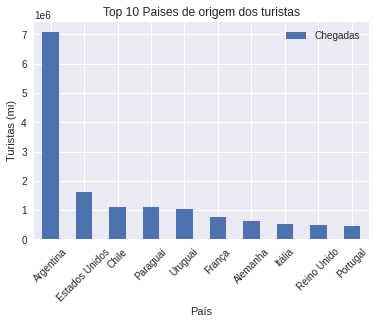

In [ ]:
#Visualização dos top 10 países de origem dos turistas
df_top10.plot.bar(x='País', y='Chegadas')
plt.xticks(rotation=45)
plt.xlabel("País")
plt.ylabel("Turistas (mi)")
plt.title('Top 10 Paises de origem dos turistas');





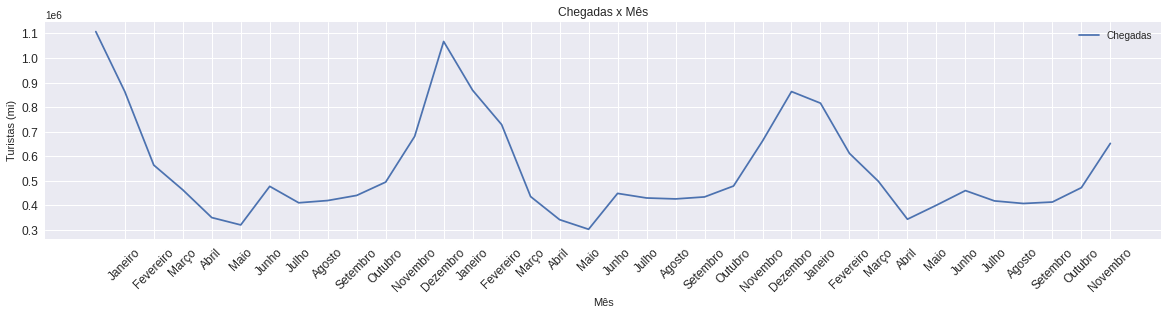

In [ ]:
df_mes = df_turismo.groupby(['ano', 'cod mes', 'Mês'])['Chegadas'].sum().reset_index()
df_mes.plot(x ='Mês' , y='Chegadas')
plt.xticks(rotation=45)
plt.xlabel("Mês" )
plt.xticks(range(1, 36), labels=df_mes['Mês'])
plt.ylabel("Turistas (mi)")
plt.tick_params(labelsize=12)
plt.title("Chegadas x Mês")
plt.gcf().set_size_inches(20, 4);


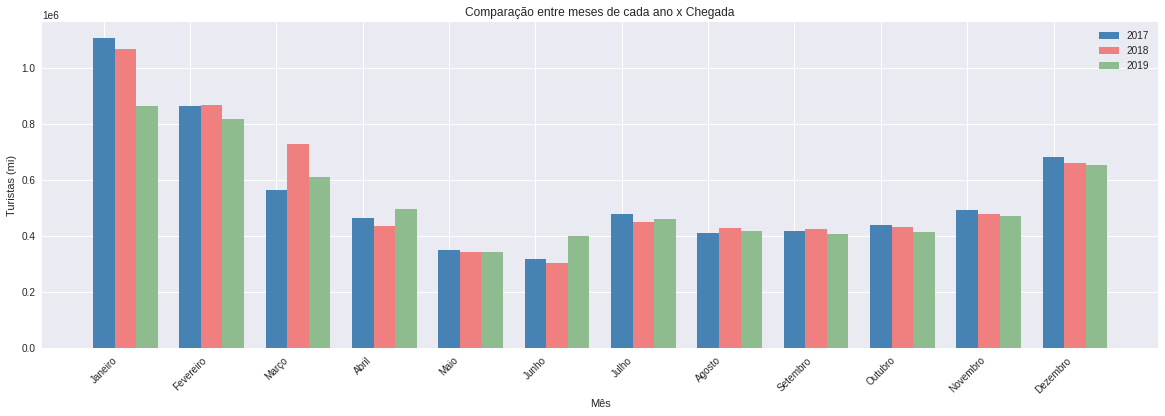

In [ ]:
#Grafico de barras clusterizado para comparação entre os meses de cada ano

plt.figure(figsize = (20, 6))

colors = ['steelblue', 'lightcoral', 'darkseagreen']

df_2017 = df_mes[df_mes['ano'] == 2017]
df_2018 = df_mes[df_mes['ano'] == 2018]
df_2019 = df_mes[df_mes['ano'] == 2019]


plt.bar(df_2017['cod mes'], df_2017['Chegadas'], color=colors[0], width=0.25)
plt.bar(df_2018['cod mes'] + 0.25, df_2018['Chegadas'], color=colors[1], width=0.25)
plt.bar(df_2019['cod mes'] + 0.5, df_2019['Chegadas'], color=colors[2], width=0.25)

plt.xticks(rotation=45)
plt.xlabel("Mês" )
plt.xticks(range(1, 13), labels=df_mes['Mês'])
plt.ylabel("Turistas (mi)")
plt.title("Comparação entre meses de cada ano x Chegada");

plt.legend(['2017', '2018', '2019'])

plt.show()

In [ ]:
df_uf = df_turismo.groupby(['UF', 'ano', 'Mês', 'cod mes'])['Chegadas'].sum().reset_index()

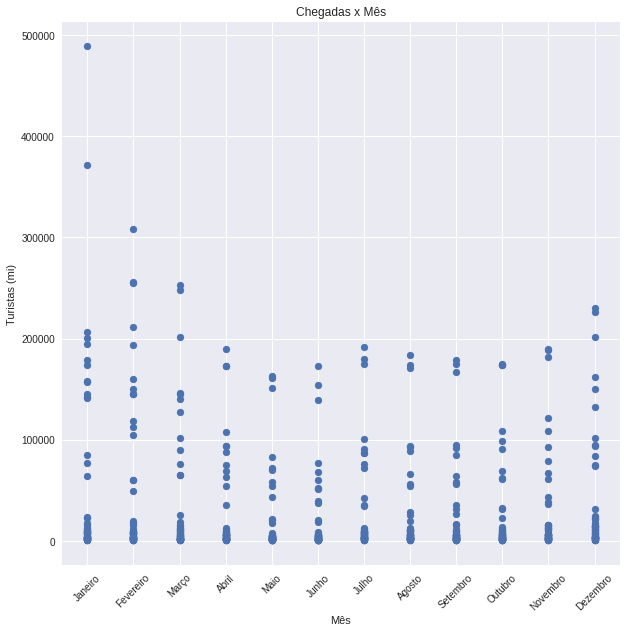

In [ ]:
plt.figure(figsize=(10, 10))

plt.scatter(df_uf['cod mes'], df_uf['Chegadas'])
plt.xticks(rotation=45)
plt.xlabel("Mês" )
plt.xticks(range(1, 13), labels=df_mes['Mês'])
plt.ylabel("Turistas (mi)")
plt.title("Chegadas x Mês");

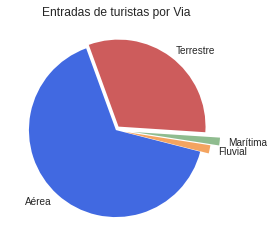

In [ ]:
#Grafico de pizza mostrando a distribuição da entrada de turistas por via
x=df_turismo.groupby('Via')['Chegadas'].sum().reset_index(inplace=False)
columns = pd.Series(x['Via'])
colors = ['royalblue', 'sandybrown', 'darkseagreen', 'indianred']
plt.pie(x['Chegadas'], explode=[0, 0.1, 0.2, 0.05], labels=columns, colors=colors ,startangle=110)
plt.title('Entradas de turistas por Via');


In [ ]:
df_uf['Chegadas'].describe().round(2)

count       648.00
mean      30190.26
std       57702.47
min         428.00
25%        2387.00
50%        5348.50
75%       17344.75
max      488893.00
Name: Chegadas, dtype: float64

In [ ]:
df_uf.nsmallest(20, 'Chegadas').sort_values(by='Chegadas', ascending=False)


,UF,ano,Mês,cod mes,Chegadas
318,Outras Unidades da Federação,2019,Junho,6,928
450,Rio Grande do Norte,2018,Junho,6,921
323,Outras Unidades da Federação,2019,Setembro,9,918
568,Roraima,2019,Janeiro,1,906
296,Outras Unidades da Federação,2017,Março,3,901
322,Outras Unidades da Federação,2019,Outubro,10,895
571,Roraima,2019,Maio,5,878
570,Roraima,2019,Junho,6,835
319,Outras Unidades da Federação,2019,Maio,5,833
442,Rio Grande do Norte,2017,Outubro,10,830


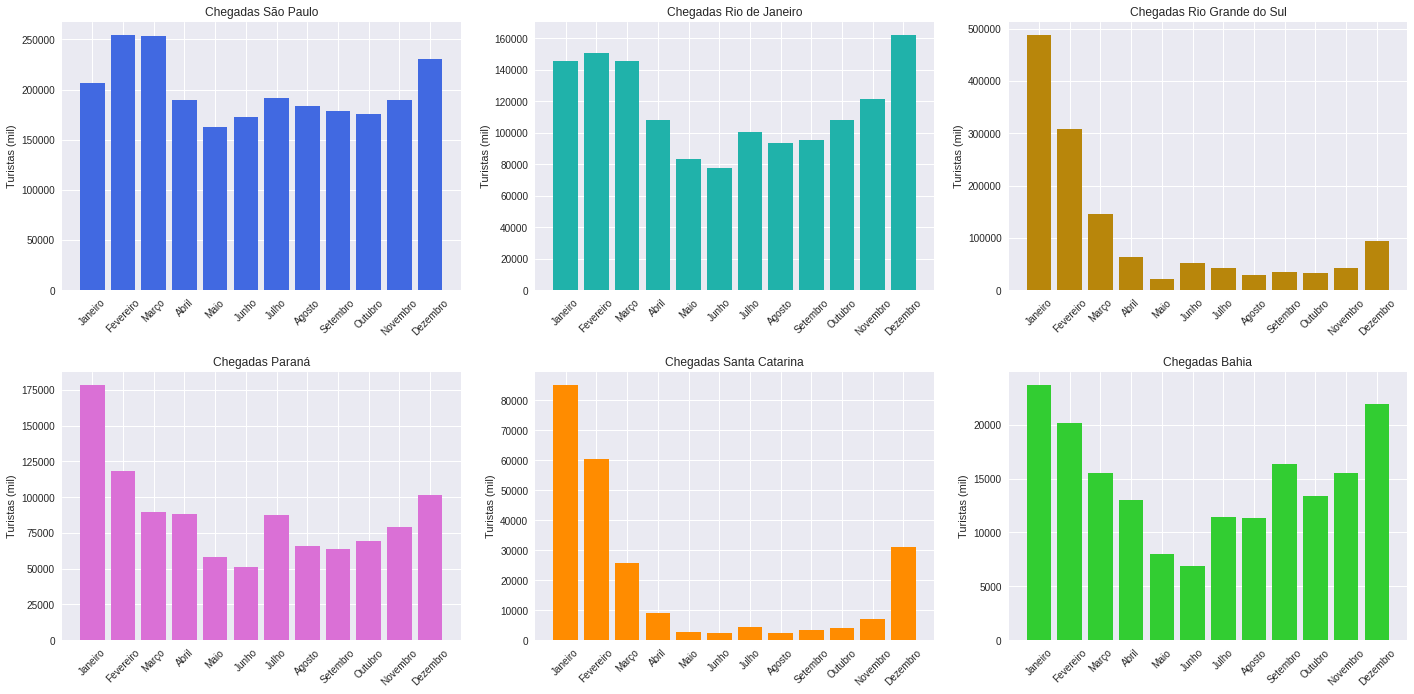

In [ ]:
#Analise dos seis estados com mais chegadas, analise por mês
fig = plt.figure(figsize=(20,10))

estados = ['São Paulo', 'Rio de Janeiro', 'Rio Grande do Sul', 'Paraná', 'Santa Catarina', 'Bahia']
cores = ['royalblue', 'lightseagreen', 'darkgoldenrod', 'orchid', 'darkorange', 'limegreen' ]

for i in range(len(estados)):
    plt.subplot(2, 3, i+1)
    x= df_uf[df_uf['UF'] == estados[i]]['cod mes']
    y= df_uf[df_uf['UF'] == estados[i]]['Chegadas']
    plt.bar(x, y, color = cores[i])
    plt.xticks(rotation=45)
    plt.xticks(range(1, 13), labels=df_mes['Mês'])
    plt.ylabel("Turistas (mil)")
    plt.title('Chegadas {}'.format(estados[i]))

plt.tight_layout(pad=2)
plt.show()

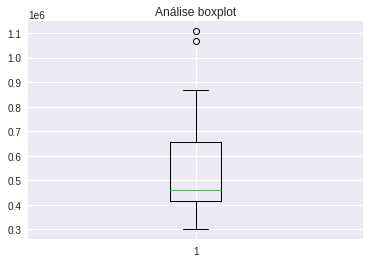

In [ ]:
#Verificando o boxplot da das chegadas por mês para verificar outliers
plt.boxplot(df_mes['Chegadas'])
plt.title('Análise boxplot');